In [1]:
import numpy as np
from biom.table import Table
from biom import load_table
import pandas as pd

In [2]:
# t = load_table("/Volumes/TBHD/Valencia/Microbiome_Analysis/Nephele_cloud_play_project/outputs/for_analyze_with_microbiomedb.biom")
t = load_table("/Volumes/TBHD_share/valencia/3sample/no_merge_trim+trim_output/for_analyze_with_microbiomedb.biom")
# print(t)
t.ids(axis='observation')

array(['TAX1', 'TAX4', 'TAX7', ..., 'TAX9966', 'TAX9968', 'TAX9970'],
      dtype='<U7')

In [3]:
phylum_idx = 5
collapse_f = lambda id_, md: '; '.join(md['Taxonomy'][5:phylum_idx + 1])
collapsed = t.collapse(collapse_f, axis='observation')

df = collapsed.to_dataframe()
display(df)

col1 = pd.DataFrame(df.iloc[:, :])
display(col1)

col1 = col1.sparse.to_dense()

,AAA00108,AAA00405,AAA00507
NA,47352.266075,34558.301552,43388.18847
Candidatus_Methanomethylophilus,81.000000,33.000000,71.00000
Candidatus_Methanoplasma,2.000000,2.000000,22.00000
Methanomassiliicoccus,32.000000,8.000000,40.00000
Cuniculiplasma,2.000000,6.000000,6.00000
...,...,...,...
Streptococcus_phage_SpSL1,0.000000,0.000000,1.00000
Streptococcus_virus_9874,2.000000,0.000000,0.00000
Timquatrovirus,0.000000,0.000000,1.00000
Tortellinivirus,0.000000,0.000000,1.00000


,AAA00108,AAA00405,AAA00507
NA,47352.266075,34558.301552,43388.18847
Candidatus_Methanomethylophilus,81.000000,33.000000,71.00000
Candidatus_Methanoplasma,2.000000,2.000000,22.00000
Methanomassiliicoccus,32.000000,8.000000,40.00000
Cuniculiplasma,2.000000,6.000000,6.00000
...,...,...,...
Streptococcus_phage_SpSL1,0.000000,0.000000,1.00000
Streptococcus_virus_9874,2.000000,0.000000,0.00000
Timquatrovirus,0.000000,0.000000,1.00000
Tortellinivirus,0.000000,0.000000,1.00000


In [4]:
# pct = col1.div(col1.sum(axis=0), axis=0)
# col1["AAA00108_pct"] = col1["AAA00108"] / col1["AAA00108"].sum()
# pct = pct.where(pct >= 0.10).dropna()
# display(pct.where(pct >= 0.001).dropna())
# col1_largest = pct.nlargest(10, 'AAA00108')
# display(col1_largest)

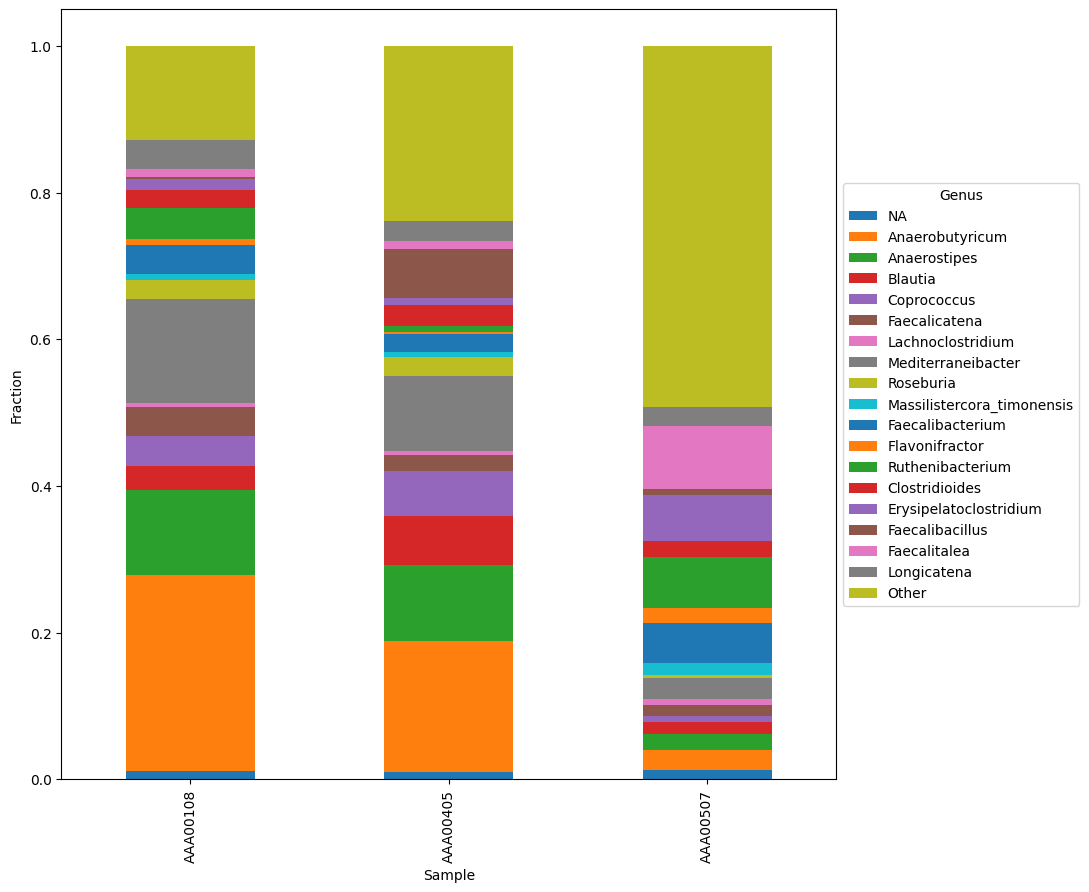

In [5]:
pct = col1.apply(lambda x: x / x.sum(), axis=0)
# display(pct)
pct = pct.where(pct >= 0.0025).dropna()

# Add other category to account for dropped samples.
pct.loc['Other']= 1.0 - pct.sum(numeric_only=True, axis=0)
# display(pct)

# import matplotlib
# matplotlib.style.use('ggplot') 
pct.T.plot.bar(stacked=True, figsize=(10, 10), ylabel="Fraction", xlabel="Sample").legend(loc='center left', bbox_to_anchor=(1.0, 0.5), title="Genus")

In [8]:
pct.T

,NA,Anaerobutyricum,Anaerostipes,Blautia,Coprococcus,Faecalicatena,Lachnoclostridium,Mediterraneibacter,Roseburia,Massilistercora_timonensis,Faecalibacterium,Flavonifractor,Ruthenibacterium,Clostridioides,Erysipelatoclostridium,Faecalibacillus,Faecalitalea,Longicatena,Other
AAA00108,0.011434,0.267321,0.116093,0.032743,0.040506,0.040096,0.005602,0.141136,0.026438,0.007782,0.039224,0.008512,0.041732,0.025139,0.015605,0.002527,0.010913,0.038804,0.128393
AAA00405,0.010192,0.178396,0.103898,0.066167,0.061732,0.022461,0.004763,0.102189,0.026158,0.006532,0.025454,0.002677,0.007439,0.028842,0.009743,0.066388,0.011801,0.026894,0.238273
AAA00507,0.012400,0.027153,0.022299,0.017113,0.007088,0.014915,0.008417,0.028454,0.005229,0.015700,0.054315,0.020345,0.069831,0.021851,0.062809,0.007949,0.085870,0.026031,0.492230


In [9]:
import plotly.express as px
fig = px.bar(pct.T, x=pct.index, y="Fraction", color="Genus", barmode="group", title="Genus")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['NA', 'Anaerobutyricum', 'Anaerostipes', 'Blautia', 'Coprococcus', 'Faecalicatena', 'Lachnoclostridium', 'Mediterraneibacter', 'Roseburia', 'Massilistercora_timonensis', 'Faecalibacterium', 'Flavonifractor', 'Ruthenibacterium', 'Clostridioides', 'Erysipelatoclostridium', 'Faecalibacillus', 'Faecalitalea', 'Longicatena', 'Other'] but received: AAA00108

In [7]:
# Sanity check to make sure my operations are correct.

test_df = pd.DataFrame([[1, 2, 3], [4, 5, 6], [7, 8, 9]], columns=['a', 'b', 'c'])

pct_test = test_df.apply(lambda x: x / x.sum(), axis=0)
display(pct_test)

pct_test = pct_test.where(pct_test >= 0.50).dropna()
display(pct_test)

pct_test.loc['Column_Total']= 1.0 - pct_test.sum(numeric_only=True, axis=0)
display(pct_test)

,a,b,c
0,0.083333,0.133333,0.166667
1,0.333333,0.333333,0.333333
2,0.583333,0.533333,0.500000


,a,b,c
2,0.583333,0.533333,0.5


,a,b,c
2,0.583333,0.533333,0.5
Column_Total,0.416667,0.466667,0.5
